<a href="https://colab.research.google.com/github/tirumanagirisivasai/Deep-Learning-lab-Programs/blob/main/Experiment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [ ]:
(training_images, training_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [ ]:
print(f'training images shape = {training_images.shape}')
print(f'testing images shape = {test_images.shape}')
print(f'training labels shape = {training_labels.shape}')
print(f'testing labels shape = {test_labels.shape}')

training images shape = (50000, 32, 32, 3)
testing images shape = (10000, 32, 32, 3)
training labels shape = (50000, 1)
testing labels shape = (10000, 1)


#***Visualization***

AxesImage(size=(32, 32))


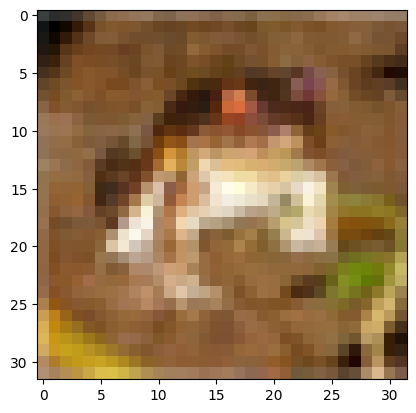

In [ ]:
##training data
import matplotlib.pyplot as plt
print(plt.imshow(training_images[0]))

In [ ]:
class_labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
print(len(class_labels))

10


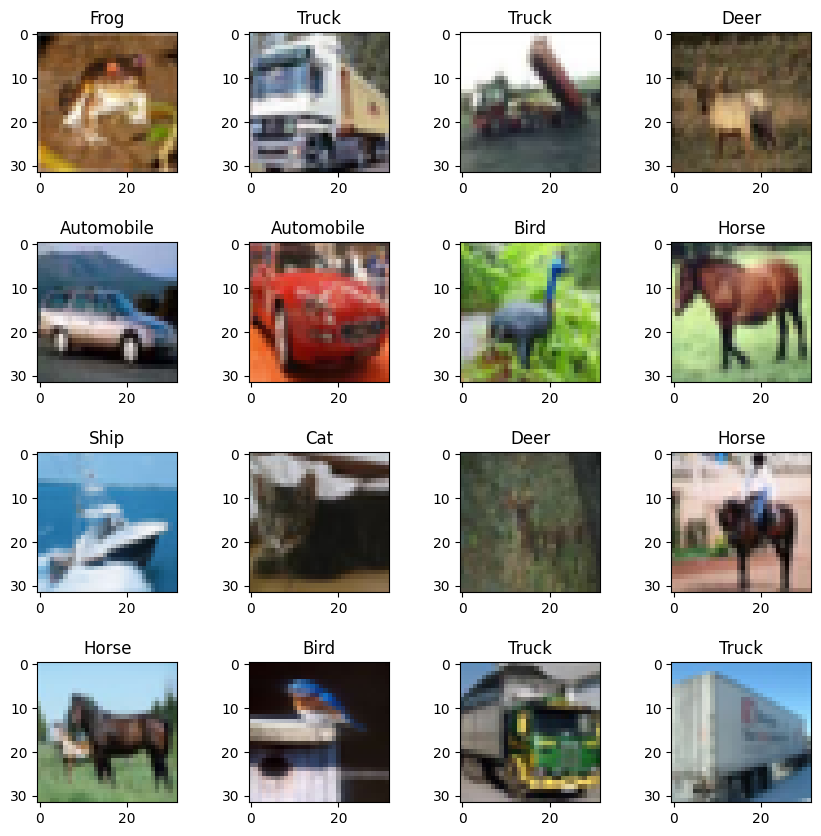

In [ ]:
#plt.figure(figsize=(10,10))
fig, axis = plt.subplots(nrows=4, ncols=4,figsize=(10,10))
for i in range(16):
  axis[i//4, i%4].imshow(training_images[i])
  axis[i//4, i%4].set_title(class_labels[training_labels[i][0]])
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [ ]:
train = training_images/255
test = test_images/255

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])#optimizer='sgd',loss=tf.keras.losses.CategoricalCrossentropy()

In [ ]:
history = model.fit(train, training_labels,batch_size=1000, epochs=5, verbose=1, validation_split=0.2)

Epoch 1/5
40/40 [==============================] - 53s 1s/step - loss: 2.0270 - accuracy: 0.2569 - val_loss: 1.7448 - val_accuracy: 0.3759
Epoch 2/5
40/40 [==============================] - 51s 1s/step - loss: 1.6123 - accuracy: 0.4192 - val_loss: 1.5173 - val_accuracy: 0.4531
Epoch 3/5
40/40 [==============================] - 50s 1s/step - loss: 1.4632 - accuracy: 0.4716 - val_loss: 1.4237 - val_accuracy: 0.4935
Epoch 4/5
40/40 [==============================] - 51s 1s/step - loss: 1.3735 - accuracy: 0.5096 - val_loss: 1.3423 - val_accuracy: 0.5267
Epoch 5/5
40/40 [==============================] - 57s 1s/step - loss: 1.3133 - accuracy: 0.5321 - val_loss: 1.3248 - val_accuracy: 0.5297


In [44]:
test_image = test_images[0]  # Selecting the first image
test_image = np.expand_dims(test_image, axis=0)  # Adding a batch dimension
predicted = model.predict(test_image)

1/1 [==============================] - 0s 95ms/step


In [51]:
print(np.argmax(predicted))
print(test_labels[0])

3
[3]


In [35]:
test_images[0].shape

(32, 32, 3)

In [ ]:
model.evaluate(test, test_labels)

313/313 [==============================] - 4s 11ms/step - loss: 1.3156 - accuracy: 0.5304


[1.315602421760559, 0.5303999781608582]

In [ ]:
print(f'Training accuracy = {} Testing Accuracy = {}')

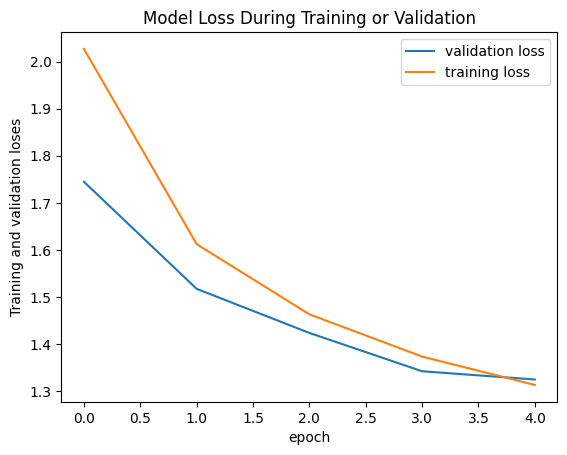

In [ ]:
plt.plot(history.history['val_loss'], label='validation loss')
plt.plot(history.history['loss'], label='training loss')
plt.ylabel('Training and validation loses')
plt.xlabel('epoch')
plt.title('Model Loss During Training or Validation')
plt.legend()
plt.show()